In [6]:
import numpy as np
import pandas as pd
import sqlite3

In [7]:
data = pd.read_csv('fatal_encounters_dot_org.csv', delimiter = ',')

In [8]:
data.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25747,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747,2000
1,25748,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748,2000
2,25746,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,01/01/2000,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746,2000
3,25749,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,01/01/2000,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749,2000
4,1,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,01/02/2000,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1,2000


In [8]:
data.describe()

,Unique ID,Location of death (zip code),Latitude,Longitude,Unique ID formula,Unique identifier (redundant)
count,28195.000000,28007.000000,28195.000000,28195.000000,1.0,28195.000000
mean,14098.000000,58425.401685,36.775975,-95.425768,27497.0,14098.000000
std,8139.339756,28004.932278,5.153519,16.371433,NaN,8139.339756
min,1.000000,1013.000000,19.034681,-165.591880,27497.0,1.000000
25%,7049.500000,33150.000000,33.553116,-111.324690,27497.0,7049.500000
50%,14098.000000,60804.000000,36.706718,-90.554839,27497.0,14098.000000
75%,21146.500000,85051.000000,40.426884,-82.572203,27497.0,21146.500000
max,28195.000000,99921.000000,71.301250,89.989700,27497.0,28195.000000


In [9]:
data.describe(include = 'all')

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
count,28195.000000,28195,27217,28102,28195,27793,27785,12823,28195,27657,...,28195,28195,28195,28193,28134,3,28160,1.0,28195.000000,28195
unique,NaN,26844,122,5,8,10,6965,12769,7158,25911,...,15,26785,92,26226,4,3,26844,NaN,NaN,23
top,NaN,Name withheld by police,22,Male,European-American/White,European-American/White,not imputed,http://photos1.blogger.com/blogger/282/183/160...,02/19/2003,2347 S. Michigan Ave.,...,Gunshot,"On February 19, 2003, 21 people were killed an...",Unreported,http://www.usatoday.com/pages/interactives/bla...,No,https://www.youtube.com/watch?v=EzJyma8kPTc&ap...,"2/19/2003: On February 19, 2003, 21 people wer...",NaN,NaN,2018
freq,NaN,1125,908,25421,9097,13361,19367,3,23,21,...,20024,21,10351,132,18746,1,21,NaN,NaN,1845
mean,14098.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27497.0,14098.000000,NaN
std,8139.339756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8139.339756,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27497.0,1.000000,NaN
25%,7049.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27497.0,7049.500000,NaN
50%,14098.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27497.0,14098.000000,NaN
75%,21146.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27497.0,21146.500000,NaN


In [11]:
data.isnull().sum()

Unique ID                                                             0
Subject's name                                                        0
Subject's age                                                       978
Subject's gender                                                     93
Subject's race                                                        0
Subject's race with imputations                                     402
Imputation probability                                              410
URL of image of deceased                                          15372
Date of injury resulting in death (month/day/year)                    0
Location of injury (address)                                        538
Location of death (city)                                             35
Location of death (state)                                             0
Location of death (zip code)                                        188
Location of death (county)                                      

In [14]:
data["Subject's gender"].fillna("Unknown", inplace = True)
data["Subject's age"].fillna("35", inplace = True)
data["Location of injury (address)"].fillna("Unknown", inplace = True)
data["Location of death (city)"].fillna("Unknown", inplace = True)
data["Agency responsible for death"].fillna("Unknown", inplace = True)

In [15]:
data.isnull().sum()

Unique ID                                                             0
Subject's name                                                        0
Subject's age                                                         0
Subject's gender                                                      0
Subject's race                                                        0
Subject's race with imputations                                     402
Imputation probability                                              410
URL of image of deceased                                          15372
Date of injury resulting in death (month/day/year)                    0
Location of injury (address)                                          0
Location of death (city)                                              0
Location of death (state)                                             0
Location of death (zip code)                                        188
Location of death (county)                                      

In [16]:
data.to_csv(r'cleandata.csv',index = False)

In [8]:
conn = sqlite3.connect("C:/Users/riyas/Downloads/SQLiteStudio-3.2.1/SQLiteStudio/chinook.db")

In [9]:
cur = conn.cursor()

In [10]:
cur.execute("select * from deatharrest limit 5")

In [12]:
results = cur.fetchall()
print(results)

[(1, 'For Those About To Rock We Salute You', 1), (2, 'Balls to the Wall', 2), (3, 'Restless and Wild', 2), (4, 'Let There Be Rock', 1), (5, 'Big Ones', 3)]


In [17]:
df2 = pd.read_csv('cleandata.csv')

In [19]:
df2.head()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25747,Mark A. Horton,21,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747,2000
1,25748,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,not imputed,NaN,01/01/2000,Davison Freeway,...,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748,2000
2,25746,Samuel H. Knapp,17,Male,European-American/White,European-American/White,not imputed,NaN,01/01/2000,27898-27804 US-101,...,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746,2000
3,25749,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,not imputed,NaN,01/01/2000,600 W Cherry Ln,...,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749,2000
4,1,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,not imputed,NaN,01/02/2000,5700 block Mack Road,...,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1,2000


In [24]:
df2["Subject's race"].value_counts()

European-American/White    9097
Race unspecified           8740
African-American/Black     5985
Hispanic/Latino            3620
Asian/Pacific Islander      424
Native American/Alaskan     280
Middle Eastern               48
HIspanic/Latino               1
Name: Subject's race, dtype: int64

In [26]:
import matplotlib

Text(0, 0.5, 'Frequency')

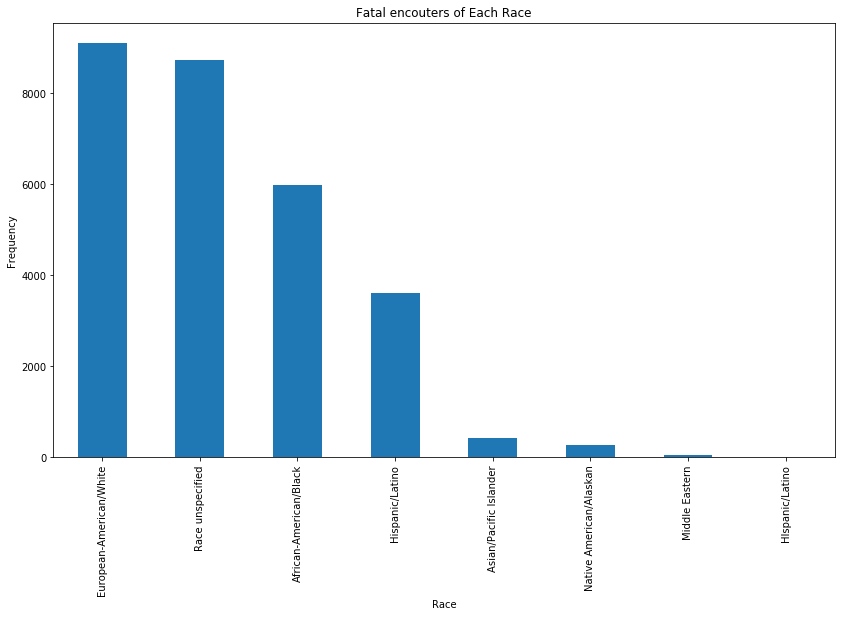

In [27]:
ax = df2["Subject's race"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Fatal encouters of Each Race")
ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

In [25]:
df2["Subject's gender"].value_counts()

Male           25421
Female          2664
Unknown           93
Transgender       15
Transexual         1
White              1
Name: Subject's gender, dtype: int64

Text(0, 0.5, 'Frequency')

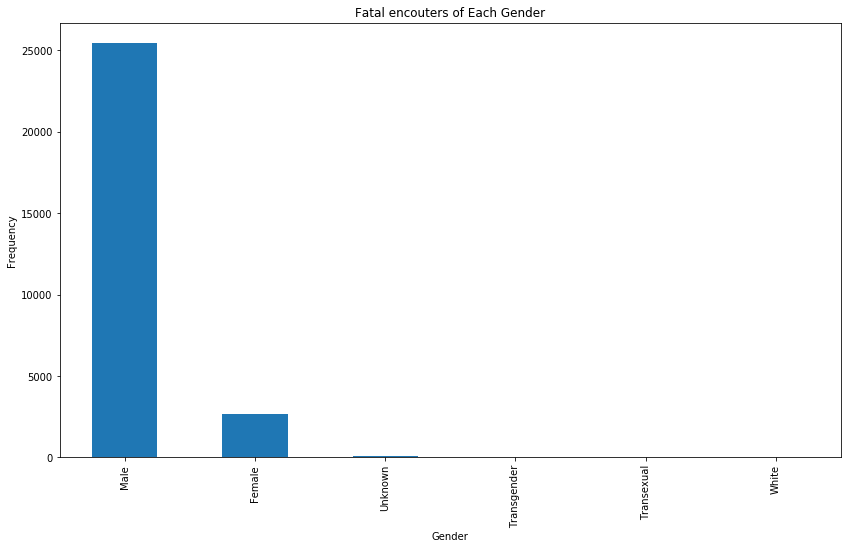

In [28]:
ax2 = df2["Subject's gender"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Fatal encouters of Each Gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Frequency")

In [36]:
df2["Cause of death"].value_counts()

Gunshot                              20024
Vehicle                               5760
Tasered                                906
Medical emergency                      377
Asphyxiated/Restrained                 266
Beaten/Bludgeoned with instrument      174
Drug overdose                          173
Drowned                                168
Undetermined                            99
Fell from a height                      73
Other                                   57
Stabbed                                 48
Burned/Smoke inhalation                 35
Chemical agent/Pepper spray             34
Unknown                                  1
Name: Cause of death, dtype: int64

Text(0, 0.5, 'Frequency')

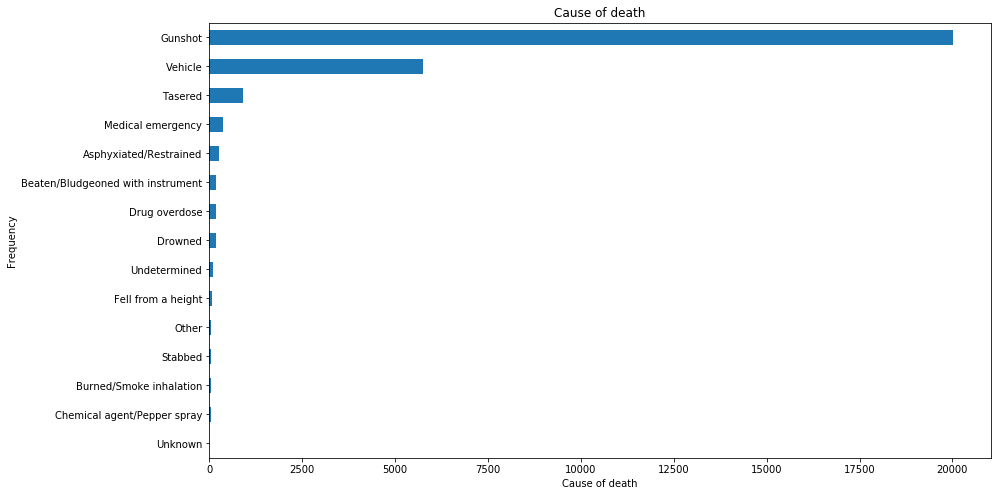

In [55]:
ax3 = df2["Cause of death"].value_counts().sort_values().plot(kind='barh',
                                    figsize=(14,8),
                                    title="Cause of death")
ax3.set_xlabel("Cause of death")
ax3.set_ylabel("Frequency")

In [46]:
dty = df2["Date (Year)"].value_counts()
dty2 = dty.sort_values()
dty2

#VALUE!       1
#REF!         7
2000        851
2020        883
2001        923
2002        986
2004       1037
2003       1052
2005       1171
2008       1209
2007       1256
2009       1257
2006       1269
2010       1291
2011       1408
2012       1487
2016       1595
2015       1607
2014       1716
2017       1767
2013       1782
2019       1795
2018       1845
Name: Date (Year), dtype: int64

Text(0, 0.5, 'Frequency')

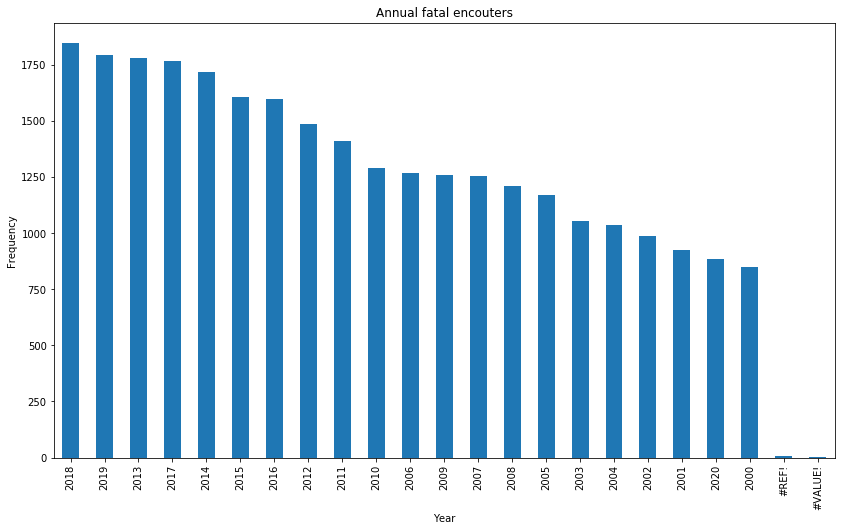

In [69]:
y_pos = np.arange(len("Date (Year)"))
ax4 = df2["Date (Year)"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Annual fatal encouters")
ax4.set_xlabel("Year")
ax4.set_ylabel("Frequency")